## Outlier Removal Using Z-Score 

In [12]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# load dataset
df = pd.read_csv('../Dataset/placement.csv')

In [14]:
# Display random 5 samples from the dataframe
df.sample(5)

,cgpa,placement_exam_marks,placed
400,6.00,33.0,1
856,7.52,6.0,1
378,7.27,25.0,1
278,5.23,17.0,1
365,7.07,25.0,0


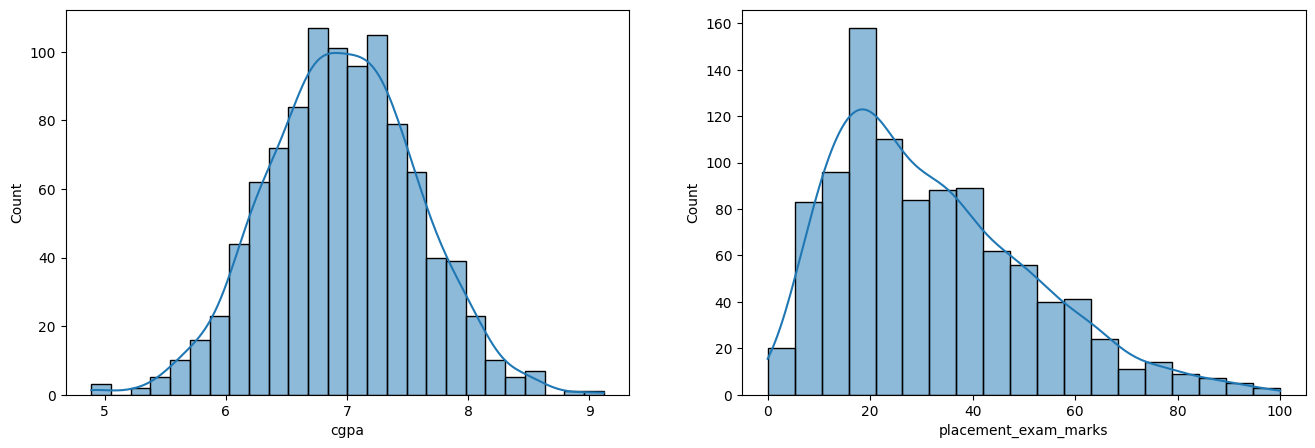

In [15]:
# Visualizing the distribution of 'cgpa' and 'placement_exam_marks' before outlier removal
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.histplot(df['cgpa'], kde=True)

plt.subplot(122)
sns.histplot(df['placement_exam_marks'], kde=True)
plt.show()

In [16]:
# Statistical measures before outlier removal
print('Mean value of cgpa', df['cgpa'].mean())
print('Std value of cgpa', df['cgpa'].std())
print('Min value of cgpa', df['cgpa'].min())
print('Max value of cgpa', df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [17]:
# Fniding the boundary values
print('Highest allowed', df['cgpa'].mean() + 3*df['cgpa'].std())
print('Lowest allowed', df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [18]:
# finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [19]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


Text(0.5, 1.0, 'After removing Outliers')

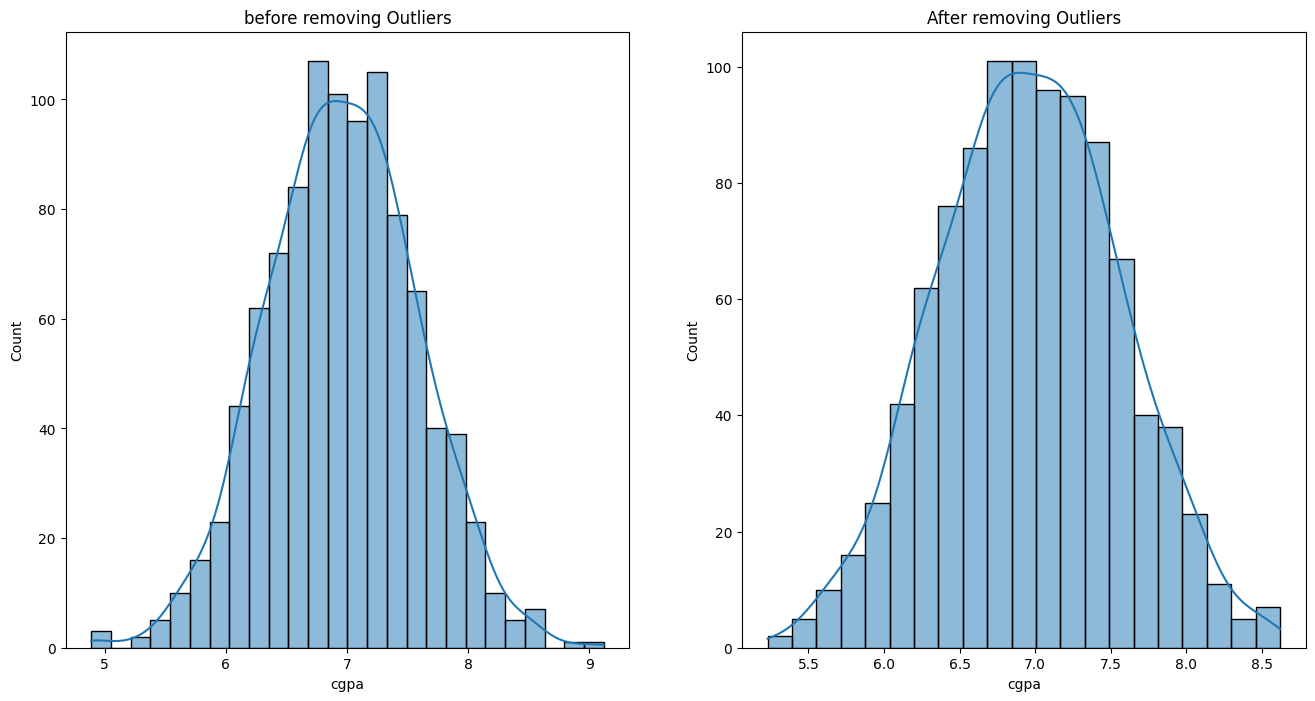

In [20]:
# plotting before and after removing outliers
plt.figure(figsize=(16,8))
plt.subplot(121)

sns.histplot(df['cgpa'], kde=True)
plt.title('before removing Outliers')

plt.subplot(122)
sns.histplot(new_df['cgpa'], kde=True)
plt.title('After removing Outliers')

In [21]:
# Approach 2
# calculating the Zscore
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean()) / df['cgpa'].std()

In [22]:
# display the first few rows of the dataframe
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [23]:
# finding the outliers using z-score
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [24]:
# finding the outliers using z-score
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [34]:
# finding the outliers using z-score
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,5.113546,44.0,1,-3.314251
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
999,5.113546,10.0,1,-3.346724


In [26]:
# trimming
new_df = df[(df['cgpa_zscore'] <3) & (df['cgpa_zscore'] > -3)]

In [27]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# Capping


In [35]:
# calculating the boundary values again
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [36]:
# display the boundary values
print('Upper limit', upper_limit)
print('Lower limit', lower_limit)

Upper limit 8.799563584169265
Lower limit 5.123433428579941


In [37]:
# capping
df['cgpa'] = np.where(
    df['cgpa']> upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [31]:
df.shape

(1000, 4)

In [38]:
# display statistical measures after capping
df['cgpa'].describe()

count    1000.000000
mean        6.961509
std         0.612543
min         5.123433
25%         6.550000
50%         6.960000
75%         7.370000
max         8.799564
Name: cgpa, dtype: float64

<Axes: xlabel='cgpa', ylabel='Count'>

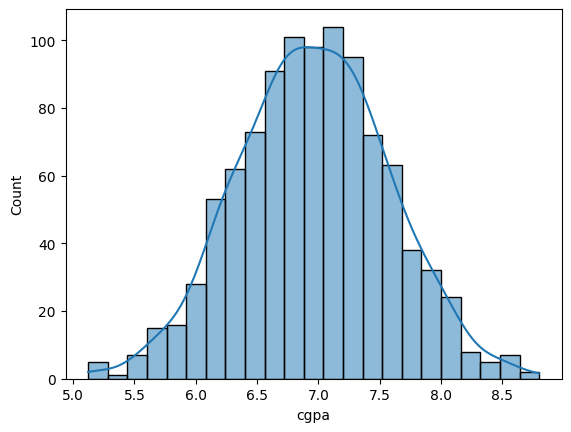

In [39]:
# plotting after capping
sns.histplot(df['cgpa'], kde=True)